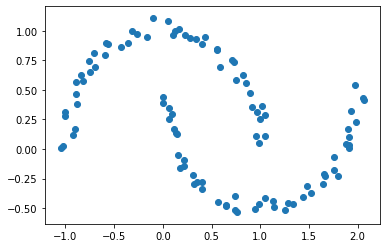

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline

moons = make_moons(n_samples = 100, shuffle = True, noise = .05)
plt.scatter(moons[0][:, 0], moons[0][:, 1])

In [3]:
len(moons)

2

In [4]:
len(moons[0])

100

In [14]:
len(moons[0][0])

2

In [8]:
moons

(array([[ 0.97309138,  0.26550515],
        [ 0.98245585,  0.387732  ],
        [-0.98127792,  0.40904312],
        [-0.46483567,  0.94622809],
        [-0.73694738,  0.77623721],
        [ 0.40127248,  0.97681068],
        [ 0.39679881,  0.98376833],
        [-0.34714537,  0.96564425],
        [ 0.01307427,  0.27950543],
        [ 2.01340001,  0.55962056],
        [ 0.73222714, -0.48144867],
        [ 0.8700713 ,  0.46816731],
        [ 1.41645267, -0.43065966],
        [ 0.20404746, -0.271029  ],
        [ 1.17755151, -0.35843805],
        [ 0.69390315,  0.71489672],
        [-0.37373172,  1.01570939],
        [ 1.99134417,  0.25389022],
        [ 0.32564252,  0.94229184],
        [ 0.9222257 , -0.55575919],
        [ 1.98571933,  0.33694684],
        [ 0.29658677, -0.18883647],
        [ 1.487835  , -0.46835889],
        [ 1.09287851, -0.44342891],
        [ 1.01613144, -0.02818469],
        [ 0.57748441,  0.78321607],
        [ 0.09828515,  0.15136903],
        [-0.98333571,  0.222

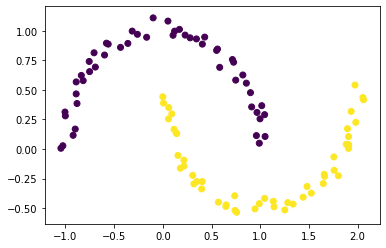

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = .3).fit(moons[0])
plt.scatter(moons[0][:, 0], moons[0][:, 1], c = dbscan.labels_)

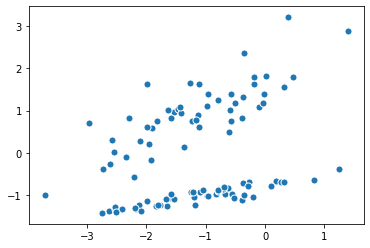

In [51]:
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

X = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, 
                        n_clusters_per_class = 1)
plt.scatter(X[0][:, 0], X[0][:, 1], marker = 'o', s = 50, edgecolor = 'w')

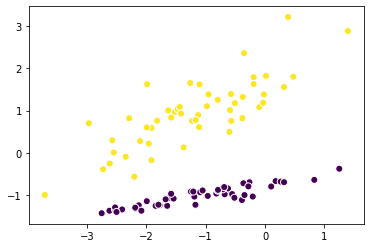

In [52]:
gmm = GaussianMixture(n_components = 2, covariance_type = 'full').fit(X[0])
plt.scatter(X[0][:, 0], X[0][:, 1], marker = 'o', c = gmm.predict(X[0]), s = 50, edgecolor = 'w')

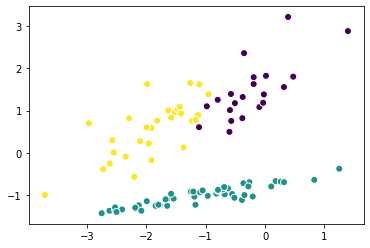

In [53]:
gmm = GaussianMixture(n_components = 3, covariance_type = 'full').fit(X[0])
plt.scatter(X[0][:, 0], X[0][:, 1], marker = 'o', c = gmm.predict(X[0]), s = 50, edgecolor = 'w')

Model 1 Silhouette Score: 0.371587658552798
Model 2 Silhouette Score: 0.48645323658831074


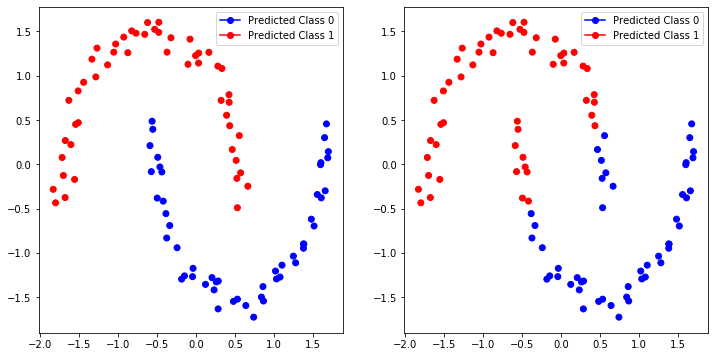

In [57]:
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score

n_samples = 100
X, y = datasets.make_moons(n_samples = n_samples, noise = .05)
X = StandardScaler().fit_transform(X)

single = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'single')
kmeans = cluster.KMeans(n_clusters =2)
single.fit(X)
y1_pred = single.labels_.astype(np.int)
kmeans.fit(X)
y2_pred = kmeans.predict(X)


fig, ax = plt.subplots(1, 2, figsize = (12, 6))
colors = np.array(['blue', 'red'])
legend_elems = [Line2D([0], [0], color = color, marker = 'o', label = "Predicted Class {}".format(i)) 
                for i, color in enumerate(colors)]
ax[0].scatter(X[:, 0], X[:, 1], color = colors[y1_pred])
ax[0].legend(handles = legend_elems, loc = 'upper right')
ax[1].scatter(X[:, 0], X[:, 1], color = colors[y2_pred])
ax[1].legend(handles = legend_elems, loc = 'upper right')

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

# k-means seems like it's working better via silhouette scores, but not performing better in reality

In [58]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (4, 12))
visualizer.fit(X)
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'